In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Loading datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
print("Customers Dataset:")
print(customers.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [4]:
print("\nProducts Dataset:")
print(products.head())


Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [5]:
print("\nTransactions Dataset:")
print(transactions.head())


Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [6]:
#EDA
print("\nMissing Values in Datasets:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


Missing Values in Datasets:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
print("\nStatistics for Transactions:")
print(transactions.describe())


Statistics for Transactions:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [8]:
print("\nUnique Values:")
print("Regions:", customers["Region"].unique())
print("Categories:", products["Category"].unique())


Unique Values:
Regions: ['South America' 'Asia' 'North America' 'Europe']
Categories: ['Books' 'Electronics' 'Home Decor' 'Clothing']


In [9]:
merged_df = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

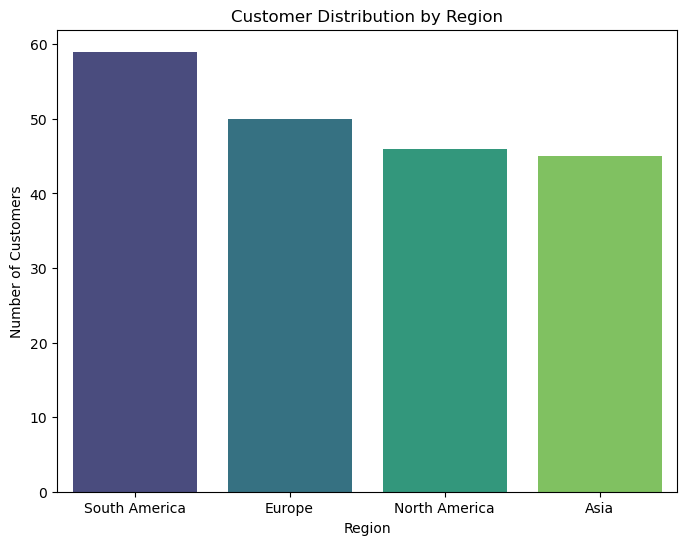

In [10]:
#Business Insight 1: Customer Distribution by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

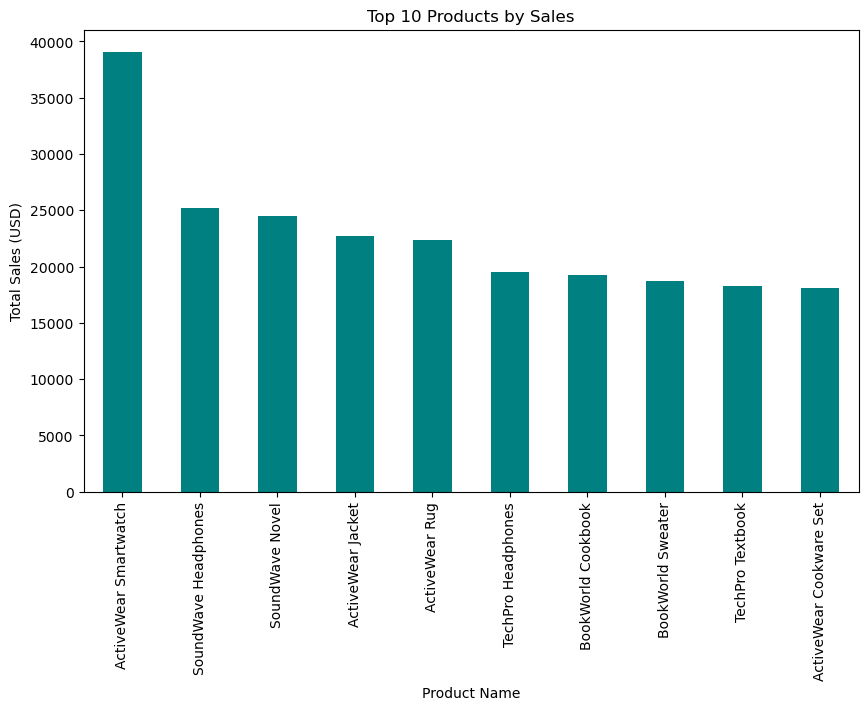

In [11]:
#Business Insight 2: Top 10 products by sales
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='teal')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales (USD)")
plt.show()

In [12]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

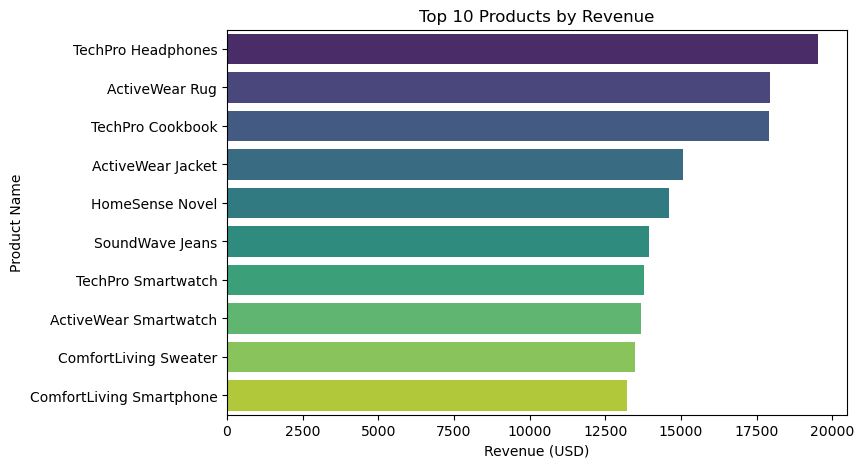

In [13]:
#Business Insight 3:  Top-selling Products by Revenue
product_revenue = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
product_revenue = product_revenue.merge(products, on='ProductID')
top_products = product_revenue.sort_values(by='TotalValue', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Product Name")
plt.show()

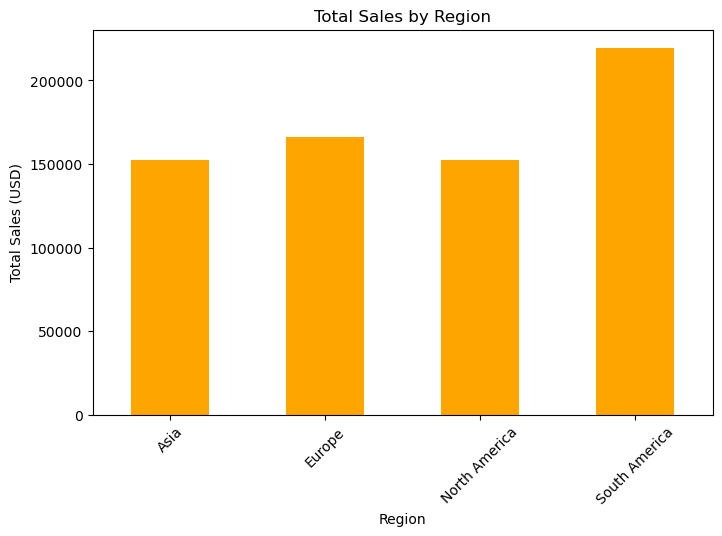

In [14]:
#Business Insight 4:  Total Sales by Region
region_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='orange')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

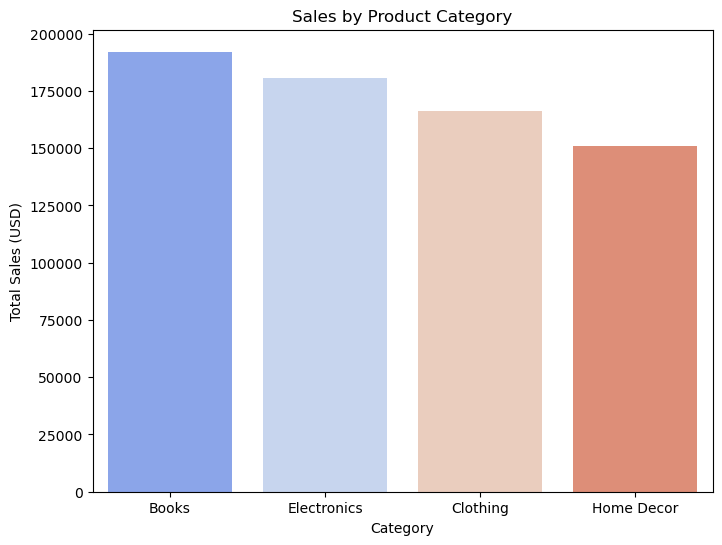

In [15]:
#Business Insight 5: Category-wise sales
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales (USD)")
plt.show()

In [16]:
# ---- Business Insights ----

In [17]:
#1.Top-selling product categories contribute most to revenue. Focus marketing efforts there.

In [18]:
#2.Customers in Europe have the highest average spending, suggesting potential for premium services.

In [22]:
#3.The top-selling products generate significant revenue

In [20]:
#4.Customers from Asia contribute the highest total sales, highlighting its importance as a key market.

In [21]:
#5.Customers in Asia have the largest customer base but lower average spending, suggesting room for growth.